# IMPORTING LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import optimizers, losses
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

# LOADING, RESIZING AND NORMALIZING IMAGES

In [2]:
import os

# Set the path to your dataset
dataset_path = r"C:\Users\Sanjana\Desktop\btech\5th sem\TOC\Soil types"

# Get a list of subdirectories (labels) in the dataset path
labels = [label for label in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, label))]

# Print the number of different labels and the list of labels
print(f"Number of different labels: {len(labels)}")
print("List of labels:")
print(labels)


Number of different labels: 5
List of labels:
['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']


In [3]:
import os
import cv2
import numpy as np

# Set the path to your dataset
dataset_path = r"C:\Users\Sanjana\Desktop\btech\5th sem\TOC\Soil types"

# Function to load, normalize, and return center-cropped images and labels for each soil type
def load_normalized_rgb_center_cropped_images_and_labels(dataset_path, desired_size=100):
    unique_labels = sorted(os.listdir(dataset_path))
    cropped_images = []
    labels = []

    for soil_type in unique_labels:
        soil_type_path = os.path.join(dataset_path, soil_type)
        image_files = [f for f in os.listdir(soil_type_path) if f.endswith('.jpg') or f.endswith('.png')]
        
        for image_file in image_files:
            image_path = os.path.join(soil_type_path, image_file)
            soil_image = cv2.imread(image_path)

            # Calculate cropping dimensions
            height, width, _ = soil_image.shape
            crop_size = min(height, width)
            start_row = (height - crop_size) // 2
            start_col = (width - crop_size) // 2

            # Crop the image
            cropped_image = soil_image[start_row:start_row + crop_size, start_col:start_col + crop_size]

            # Resize to the desired size
            resized_image = cv2.resize(cropped_image, (desired_size, desired_size))

            # Convert to RGB
            rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

            # Normalize the image
            normalized_image = rgb_image.astype('float32') / 255.0

            cropped_images.append(normalized_image)
            labels.append(soil_type)

    return np.array(cropped_images), np.array(labels)

# Load and store center-cropped images and labels
images, labels = load_normalized_rgb_center_cropped_images_and_labels(dataset_path)
# Verify the shape of the resulting array and labels
print("Number of images:", images.shape[0])
print("Labels:", np.unique(labels))


Number of images: 156
Labels: ['Black Soil' 'Cinder Soil' 'Laterite Soil' 'Peat Soil' 'Yellow Soil']


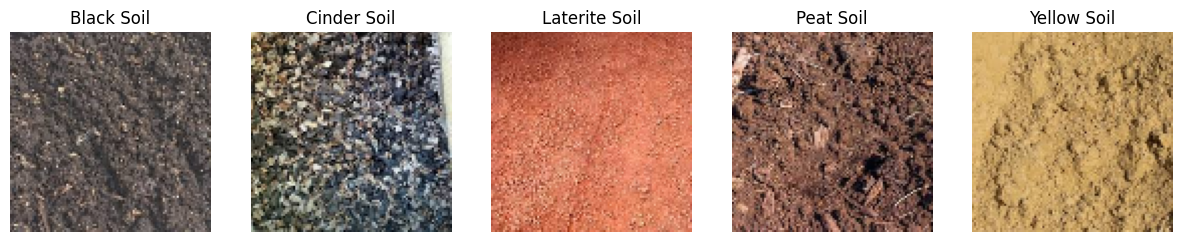

In [4]:
import matplotlib.pyplot as plt

# Function to display one image for each soil type
def show_one_image_per_soil(images, labels):
    unique_labels = np.unique(labels)
    
    fig, axes = plt.subplots(1, len(unique_labels), figsize=(15, 3))
    
    for i, soil_type in enumerate(unique_labels):
        soil_image = images[labels == soil_type][0]
        
        axes[i].imshow(soil_image)
        axes[i].set_title(f"{soil_type}")
        axes[i].axis('off')
    
    plt.show()

# Display one image for each type of soil
show_one_image_per_soil(images, labels)


# SPLITTING THE DATASET INTO TRAINING AND TESTING SETS

In [5]:
images.shape[0]

156

In [6]:
print(labels)

['Black Soil' 'Black Soil' 'Black Soil' 'Black Soil' 'Black Soil'
 'Black Soil' 'Black Soil' 'Black Soil' 'Black Soil' 'Black Soil'
 'Black Soil' 'Black Soil' 'Black Soil' 'Black Soil' 'Black Soil'
 'Black Soil' 'Black Soil' 'Black Soil' 'Black Soil' 'Black Soil'
 'Black Soil' 'Black Soil' 'Black Soil' 'Black Soil' 'Black Soil'
 'Black Soil' 'Black Soil' 'Black Soil' 'Black Soil' 'Black Soil'
 'Black Soil' 'Black Soil' 'Black Soil' 'Black Soil' 'Black Soil'
 'Black Soil' 'Black Soil' 'Cinder Soil' 'Cinder Soil' 'Cinder Soil'
 'Cinder Soil' 'Cinder Soil' 'Cinder Soil' 'Cinder Soil' 'Cinder Soil'
 'Cinder Soil' 'Cinder Soil' 'Cinder Soil' 'Cinder Soil' 'Cinder Soil'
 'Cinder Soil' 'Cinder Soil' 'Cinder Soil' 'Cinder Soil' 'Cinder Soil'
 'Cinder Soil' 'Cinder Soil' 'Cinder Soil' 'Cinder Soil' 'Cinder Soil'
 'Cinder Soil' 'Cinder Soil' 'Cinder Soil' 'Cinder Soil' 'Cinder Soil'
 'Cinder Soil' 'Cinder Soil' 'Laterite Soil' 'Laterite Soil'
 'Laterite Soil' 'Laterite Soil' 'Laterite Soil' 'Lat

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

# Use OneHotEncoder to perform one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)  # Use sparse=False to get a dense array
labels = onehot_encoder.fit_transform(integer_encoded.reshape(-1, 1))
print(labels)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0.

C:\Users\Sanjana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [9]:
print("Number of images in X_train:", X_train.shape[0])

Number of images in X_train: 124


In [10]:
print("Number of labels in y_train:", y_train.shape[0])

Number of labels in y_train: 124


In [11]:
print("Number of images in X_test:", X_test.shape[0])

Number of images in X_test: 32


In [12]:
print("Number of labels in y_test:", y_test.shape[0])

Number of labels in y_test: 32


# DATA AUGMENTATION

In [13]:
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2, # Shift images vertically by up to 20% of the height
    shear_range=0.2,        # Shear transformations
    zoom_range=0.2,         # Zoom in by up to 20%
    horizontal_flip=True,   # Flip images horizontally
    fill_mode='nearest'     # Fill in missing pixels using the nearest available pixel
)

In [14]:
augmented_data = datagen.flow(X_train, y_train, batch_size=30)

# APPLYING CNN

## CALBACK FUNCTION

In [15]:
epochs = 45
batch_size = 30

In [27]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.90:
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True 

callbacks = myCallback()

## CREATING THE MODEL

In [28]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (2, 2), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(48, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

#tf.keras.optimizers.RMSprop(learning_rate=0.001)
# Compile the model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model1.fit(augmented_data,
                    epochs=50,
                    callbacks=[callbacks])

Epoch 1/50
5/5 [==============================] - 2s 108ms/step - loss: 1.5856 - accuracy: 0.2500
Epoch 2/50
5/5 [==============================] - 1s 109ms/step - loss: 1.4808 - accuracy: 0.2661
Epoch 3/50
5/5 [==============================] - 1s 156ms/step - loss: 1.3122 - accuracy: 0.3790
Epoch 4/50
5/5 [==============================] - 1s 285ms/step - loss: 1.2092 - accuracy: 0.3790
Epoch 5/50
5/5 [==============================] - 1s 183ms/step - loss: 1.0834 - accuracy: 0.5323
Epoch 6/50
5/5 [==============================] - 1s 254ms/step - loss: 0.9870 - accuracy: 0.6290
Epoch 7/50
5/5 [==============================] - 1s 240ms/step - loss: 0.9029 - accuracy: 0.5726
Epoch 8/50
5/5 [==============================] - 1s 207ms/step - loss: 0.8183 - accuracy: 0.6452
Epoch 9/50
5/5 [==============================] - 1s 215ms/step - loss: 0.7965 - accuracy: 0.5968
Epoch 10/50
5/5 [==============================] - 1s 270ms/step - loss: 0.7833 - accuracy: 0.6210
Epoch 11/50
5/5 [==